# KENYA PERCH CXR WND-CHARM Scanning Window ANALYSIS

November 2015

1. Get the intercostals
2. Get a bounding box based on expanded selection
3. Create collage of bounding box with diagnosis jpegs
3. Train 60x60 windows, overlapping by 15 px
4. Create masks from jpgs

# Software versions used here

In [1]:
import pandas as pd; print pd.__version__

0.17.0


In [2]:
import numpy as np; print np.__version__

1.10.1


In [3]:
import wndcharm; print wndcharm.__version__

0.9.12


# Identify classification area from intercostal locations

Create bounding box within which to calculate wndcharm features

In [4]:
pwd

u'/Users/colettace/projects/PERCH_Kenya/All_CXR'

In [5]:
cd training_set/

/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set


In [6]:
ls *.csv

Human_locating_abnormal_TRAINING_SET.csv  ic_coords.csv                             master_KENYA_strip_data.csv               strip_sizes.csv


In [7]:
diagnoses = pd.DataFrame.from_csv( 'Human_locating_abnormal_TRAINING_SET.csv')

In [8]:
diagnoses.index = diagnoses['Subject ID']

In [9]:
diagnoses.head()

,Subject ID,CXR_ID,Draw_in_Folder,Final_conslusion,Note,Tile_1,Tile_2,Tile_3,Tile_4,Tile_5,...,Tile_13,Tile_14,Tile_15,Tile_16,Tile_17,Tile_18,Tile_19,Tile_20,Tile_21,Tile_22
Subject ID,,,,,,,,,,,,,,,,,,,,,
K00002,K00002,NaN,undrawn,4 - Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00032,K00032,NaN,undrawn,4 - Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00055,K00055,K00055-AP,3,2 - Other infiltrate only,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00069,K00069,NaN,undrawn,4 - Normal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K00086,K00086,K00086-AP,1,1 - PEP only,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
diagnoses = diagnoses[ [ 'Draw_in_Folder', 'Final_conslusion']]

In [11]:
diagnoses.head()

,Draw_in_Folder,Final_conslusion
Subject ID,,
K00002,undrawn,4 - Normal
K00032,undrawn,4 - Normal
K00055,3,2 - Other infiltrate only
K00069,undrawn,4 - Normal
K00086,1,1 - PEP only


In [12]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '4 - Normal'] = 'CLEAR'

In [13]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '2 - Other infiltrate only'] = 'OI'

In [14]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '1 - PEP only'] = 'PEP'

In [15]:
diagnoses['Final_conslusion'][ diagnoses['Final_conslusion'] == '3 - Both PEP and other infiltrate'] = 'PEP+OI'

In [16]:
diagnoses['Final_conslusion'].value_counts()

CLEAR     209
OI        115
PEP        42
PEP+OI     37
Name: Final_conslusion, dtype: int64

In [17]:
diagnoses.head()

,Draw_in_Folder,Final_conslusion
Subject ID,,
K00002,undrawn,CLEAR
K00032,undrawn,CLEAR
K00055,3,OI
K00069,undrawn,CLEAR
K00086,1,PEP


In [18]:
len(diagnoses)

403

In [19]:
ic_locs = pd.DataFrame.from_csv( 'ic_coords.csv' )

In [20]:
len(ic_locs)

403

In [21]:
ic_locs.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Subject ID
K03144,"(714, 516)","(676, 546)","(652, 592)","(638, 642)","(628, 692)","(622, 742)","(612, 792)","(596, 848)","(590, 924)","(600, 996)",...,"(998, 638)","(1004, 680)","(1012, 724)","(1018, 770)","(1018, 816)","(1016, 870)","(1028, 938)","(1024, 1008)","(1000, 1080)",K03144
K01365,"(780, 314)","(770, 336)","(750, 380)","(738, 426)","(722, 466)","(714, 504)","(712, 544)","(708, 594)","(700, 644)","(684, 712)",...,"(1102, 388)","(1126, 432)","(1142, 478)","(1156, 526)","(1174, 586)","(1176, 646)","(1194, 730)","(1192, 830)","(1180, 930)",K01365
K01366,"(704, 525)","(656, 577)","(640, 639)","(632, 695)","(630, 747)","(620, 807)","(612, 873)","(596, 943)","(568, 1043)","(564, 1163)",...,"(1084, 621)","(1102, 681)","(1120, 735)","(1142, 799)","(1162, 873)","(1182, 957)","(1194, 1063)","(1192, 1169)","(1176, 1275)",K01366
K02316,"(790, 304)","(754, 346)","(730, 392)","(708, 444)","(690, 500)","(684, 560)","(676, 618)","(658, 684)","(640, 766)","(640, 858)",...,"(1042, 404)","(1050, 452)","(1062, 508)","(1072, 578)","(1084, 630)","(1098, 698)","(1106, 782)","(1106, 876)","(1088, 972)",K02316
K05968,"(610, 410)","(564, 474)","(544, 556)","(542, 636)","(538, 712)","(530, 794)","(532, 880)","(528, 984)","(538, 1096)","(564, 1216)",...,"(1012, 550)","(1036, 620)","(1060, 694)","(1076, 768)","(1098, 852)","(1126, 948)","(1144, 1064)","(1152, 1178)","(1166, 1296)",K05968


# Normalize pixel intensity ranges

VERY WEIRD: some tiffs are 10bit pixel intensity range (1023) and some are 12bit (4095)!

In [268]:
clear_prefix = '/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/'

In [269]:
from skimage.io import imread, imsave

In [ ]:
for subjid in ic_locs.index:
    im = imread( clear_prefix + subjid + '-CXR.tif', as_grey=True )

    # TIFFs come in as 12-bit ints, but Jpegs come in as 0.0-1.0 floats
    im = im.astype( np.uint16 )
    print subjid, im.max()
    if im.max() > 1024:
        im /= 4
    imsave( clear_prefix + subjid + '.tif', im)
        

## Shrink down to middle 7 intercostals

In [22]:
ic_locs = ic_locs.drop( '0', 1 ).drop( '1', 1 ).drop('9', 1).drop('10', 1).drop('11', 1).drop('12', 1).drop('20',1).drop('21',1).drop('Subject ID',1)

In [23]:
ic_locs.head()

,2,3,4,5,6,7,8,13,14,15,16,17,18,19
K03144,"(652, 592)","(638, 642)","(628, 692)","(622, 742)","(612, 792)","(596, 848)","(590, 924)","(998, 638)","(1004, 680)","(1012, 724)","(1018, 770)","(1018, 816)","(1016, 870)","(1028, 938)"
K01365,"(750, 380)","(738, 426)","(722, 466)","(714, 504)","(712, 544)","(708, 594)","(700, 644)","(1102, 388)","(1126, 432)","(1142, 478)","(1156, 526)","(1174, 586)","(1176, 646)","(1194, 730)"
K01366,"(640, 639)","(632, 695)","(630, 747)","(620, 807)","(612, 873)","(596, 943)","(568, 1043)","(1084, 621)","(1102, 681)","(1120, 735)","(1142, 799)","(1162, 873)","(1182, 957)","(1194, 1063)"
K02316,"(730, 392)","(708, 444)","(690, 500)","(684, 560)","(676, 618)","(658, 684)","(640, 766)","(1042, 404)","(1050, 452)","(1062, 508)","(1072, 578)","(1084, 630)","(1098, 698)","(1106, 782)"
K05968,"(544, 556)","(542, 636)","(538, 712)","(530, 794)","(532, 880)","(528, 984)","(538, 1096)","(1012, 550)","(1036, 620)","(1060, 694)","(1076, 768)","(1098, 852)","(1126, 948)","(1144, 1064)"


## bounding box is (minx,miny), (maxx,maxy) for all intercostal points

In [24]:
bbs = pd.DataFrame( index=ic_locs.index, columns=['minx','miny','maxx','maxy','w','h','class','img', 'maskimg'])
for i in ic_locs.index:
    row = ic_locs.ix[i]
    s = '(' + ", ".join(row) + ')'
    X, Y = zip(*eval(s) )
    minx, miny, maxx, maxy = (min(X),min(Y),max(X),max(Y))
    bbs.ix[i] = ( minx, miny, maxx, maxy, maxx-minx, maxy-miny, None, None, None )

In [27]:
bbs['class'] = diagnoses['Final_conslusion']

In [28]:
bbs.head()

,minx,miny,maxx,maxy,w,h,class,img,maskimg
K03144,590,592,1028,938,438,346,CLEAR,None,None
K01365,700,380,1194,730,494,350,CLEAR,None,None
K01366,568,621,1194,1063,626,442,CLEAR,None,None
K02316,640,392,1106,782,466,390,CLEAR,None,None
K05968,528,550,1144,1096,616,546,OI,None,None


In [31]:
len(bbs) == len(diagnoses) == len( ic_locs)

True

# Pull in mask paths

In [32]:
pwd

u'/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set'

In [33]:
cd ../../Human_locating_abnormal/

/Users/colettace/projects/PERCH_Kenya/Human_locating_abnormal


In [34]:
ls

Backup/                               Folder2_Both_PEP&OI_different_color/  Folder4_onlyOImarked_reader2/
Folder1_onlyPEPmarked/                Folder3_onlyOImarked_reader1/         Human_locating_abnormal_results.xlsx


In [35]:
all_masks = !find . -iname *.jpg

In [36]:
all_masks[:10]

['./Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00099-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00103-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00116-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00300-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00983-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K00984-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01097-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01128-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01348-AP.jpg',
 './Backup/Batch No1/Batch1_images/mark both PEP and other infiltrate/K01548-AP.jpg']

In [37]:
import re

In [38]:
p = re.compile( r'(K\d\d\d\d\d)' )

In [39]:
from collections import defaultdict

In [40]:
mask_files = defaultdict(list)
for _ in all_masks:
    subjid = p.search(_).group()
    if subjid in bbs.index:
        mask_files[ subjid ].append( _ )

In [41]:
len( mask_files)

194

In [44]:
diff = set( mask_files.keys()) ^ set( bbs.index)

In [45]:
len(diff)

209

In [48]:
len(diff) + len(mask_files) == len( bbs)

True

The set of subjects for which there are masks is a subset of the training set.

In [49]:
dual = []
for subjid, _list in mask_files.items():
    __list = [ m for m in _list if m.startswith('./Folder') ]
    if len( __list ) > 1:
        final_conclusion = diagnoses['Final_conslusion'][subjid]
        print subjid, final_conclusion
        for _ in __list :
            print '\t', _
        dual.append( subjid )
        #bbs['maskimg'][subjid] = _path
    else:
        _path = __list[0]
        bbs['maskimg'][subjid] = _path

K05596 OI
	./Folder1_onlyPEPmarked/K05596-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K05596-AP.jpg
K02507 PEP+OI
	./Folder1_onlyPEPmarked/K02507-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K02507-AP.jpg
K01215 PEP+OI
	./Folder1_onlyPEPmarked/K01215-AP_done.JPG
	./Folder3_onlyOImarked_reader1/K01215-AP.jpg
K05237 PEP+OI
	./Folder2_Both_PEP&OI_different_color/K05237-AP_done.jpg
	./Folder4_onlyOImarked_reader2/K05237-AP.jpg
K04818 PEP+OI
	./Folder1_onlyPEPmarked/K04818-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K04818-AP.jpg
K00142 PEP
	./Folder1_onlyPEPmarked/K00142-AP_done.JPG
	./Folder3_onlyOImarked_reader1/K00142-AP.jpg
K03878 PEP
	./Folder1_onlyPEPmarked/K03878-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K03878-AP.jpg
K01488 PEP+OI
	./Folder1_onlyPEPmarked/K01488-AP_done.JPG
	./Folder4_onlyOImarked_reader2/K01488-AP.jpg


In [50]:
bbs['class'][ dual]

K05596        OI
K02507    PEP+OI
K01215    PEP+OI
K05237    PEP+OI
K04818    PEP+OI
K00142       PEP
K03878       PEP
K01488    PEP+OI
Name: class, dtype: object

In [51]:
bbs['maskimg']['K05596'] = './Folder4_onlyOImarked_reader2/K05596-AP.jpg'

In [52]:
bbs['maskimg']['K05237'] = './Folder2_Both_PEP&OI_different_color/K05237-AP_done.jpg'

In [53]:
bbs['maskimg']['K00142'] = './Folder1_onlyPEPmarked/K00142-AP_done.JPG'

In [54]:
bbs['maskimg']['K03878'] = './Folder1_onlyPEPmarked/K03878-AP_done.JPG'

In [55]:
bbs['class'].value_counts()

CLEAR     209
OI        115
PEP        42
PEP+OI     37
Name: class, dtype: int64

4 subjects have final conclusions of PEP+OI that don't match masks, set those aside for now

In [72]:
i = [ _ != 'CLEAR' for _ in bbs['class'] ]

In [73]:
j = [ _ == None for _ in bbs['maskimg'] ]

In [77]:
drop_these = np.array(i, dtype=bool) & np.array( j, dtype=bool )

In [83]:
drop_indices = np.array( np.nonzero( drop_these) ).flatten()

In [84]:
drop_indices

array([146, 243, 310, 370])

In [76]:
len(bbs)

403

In [86]:
bbs.drop( bbs.index[drop_indices], inplace=True )

In [87]:
len(bbs)

399

In [88]:
bbs['class'].value_counts()

CLEAR     209
OI        115
PEP        42
PEP+OI     33
Name: class, dtype: int64

# Pull in Tiff paths

Use Pandas' melt() function to turn intercostal location columns into rows

In [89]:
pwd

u'/Users/colettace/projects/PERCH_Kenya/Human_locating_abnormal'

In [90]:
cd ../All_CXR/

/Users/colettace/projects/PERCH_Kenya/All_CXR


In [91]:
cd training_set/

/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set


In [95]:
bbs.head()

,minx,miny,maxx,maxy,w,h,class,img,maskimg
K03144,590,592,1028,938,438,346,CLEAR,None,None
K01365,700,380,1194,730,494,350,CLEAR,None,None
K01366,568,621,1194,1063,626,442,CLEAR,None,None
K02316,640,392,1106,782,466,390,CLEAR,None,None
K05968,528,550,1144,1096,616,546,OI,None,./Folder4_onlyOImarked_reader2/K05968-AP.jpg


In [96]:
mask_prefix = '/Users/colettace/projects/PERCH_Kenya/Human_locating_abnormal/'

In [164]:
clear_prefix = '/Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/'

# Make collage of lungs and masks

In [278]:
# lung collage params
n_subjects_across = 20
subject_resolution = 50
collage_width_px = subject_resolution * n_subjects_across
n_subjects_down = int( round( 0.5 + len(bbs) / n_subjects_across ) )
collage_height_px = n_subjects_down * subject_resolution
print n_subjects_across, n_subjects_down, 

20 20


In [295]:
# mask collage params
MASK_n_subjects_across = 10
MASK_subject_resolution = 200
MASK_collage_width_px = MASK_subject_resolution * MASK_n_subjects_across
MASK_n_subjects_down = int( round( 0.5 + (len(bbs)-209) / MASK_n_subjects_across ) ) # - 209 clear
MASK_collage_height_px = MASK_n_subjects_down * MASK_subject_resolution
print MASK_n_subjects_across, MASK_collage_width_px, MASK_n_subjects_down, MASK_collage_height_px

10 2000 20 4000


In [285]:
MASK_collage_width_px

1000

In [286]:
MASK_collage_height_px

4000

In [105]:
import matplotlib.pyplot as plt

In [106]:
from PIL import Image

In [108]:
order = { 'PEP': 0, 'PEP+OI': 1, 'OI':2, 'CLEAR':3}

In [112]:
bbs.sort_index(inplace=True)

In [109]:
bbs['sort'] = [ order[ _class ] for _class in bbs['class']]

In [114]:
# mergesort is "stable" meaning won't screw up the preexisting order
bbs.sort_values( 'sort', inplace=True, kind='mergesort' )

In [116]:
%matplotlib inline

In [166]:
im = Image.open( clear_prefix + 'K02918-CXR.tif')

In [179]:
im.mode

'I'

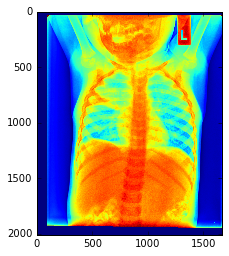

In [235]:
plt.imshow( im)

In [182]:
im16bit = np.asarray(im, dtype=np.uint16)

In [183]:
im16bit.max()

1023

In [255]:
2 ** 12

4096

In [190]:
im8bit = np.asarray(im, dtype=np.uint8)

In [191]:
im8bit.max()

255

In [265]:
from skimage.transform import resize
from skimage.util import crop
from skimage.io import imread
from skimage.io import imsave

K00086
K00142

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00086_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00142_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00250
K00321

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00250_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00321_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00325
K00394

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00325_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00394_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00420
K00503

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00420_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00503_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00799
K00873

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00799_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00873_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01135
K01809

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01135_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01809_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02433
K02516

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02433_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02516_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02557
K02633

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02557_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02633_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02705
K02718

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02705_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02718_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02789
K02820

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02789_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02820_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03588
K03878

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03588_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03878_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03952
K04054

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03952_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04054_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04117
K04172

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04117_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04172_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04326
K04389

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04326_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04389_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04458
K04830

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04458_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04830_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04884
K05091

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04884_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05091_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05099
K05210

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05099_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05210_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05219
K05267

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05219_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05267_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05356
K05389

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05356_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05389_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05547
K05616

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05547_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05616_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05735
K05822

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05735_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05822_PEP_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00099
K00103

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00099_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00103_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00116
K00300

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00116_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00300_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00983
K00984

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00983_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00984_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01097
K01128

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01097_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01128_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01348
K01548

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01348_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01548_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01954
K02364

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01954_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02364_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02396
K02486

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02396_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02486_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02539
K02690

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02539_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02690_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03013
K03408

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03013_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03408_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04857
K05030

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04857_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05030_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05047
K05113

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05047_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05113_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05237
K05249

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05237_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05249_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05272
K05278

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05272_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05278_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05304
K05421

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05304_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05421_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05611
K05687

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05611_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05687_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05750
K05978

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05750_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05978_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05985
K00055

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05985_PEP+OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00055_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00179
K00200

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00179_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00200_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00259
K00305

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00259_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00305_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00346
K00518

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00346_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00518_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00614
K00616

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00614_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00616_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00667
K00695

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00667_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00695_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00752
K00803

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00752_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00803_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00811
K00814

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00811_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00814_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00846
K00866

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00846_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00866_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00953
K00992

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00953_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00992_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00998
K01087

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00998_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01087_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01098
K01103

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01098_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01103_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01136
K01161

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01136_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01161_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01186
K01189

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01186_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01189_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01308
K01325

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01308_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01325_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01384
K01426

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01384_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01426_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01431
K01443

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01431_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01443_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01473
K01550

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01473_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01550_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01561
K01598

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01561_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01598_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01645
K01675

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01645_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01675_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01745
K01756

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01745_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01756_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01762
K01833

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01762_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01833_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01890
K01902

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01890_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01902_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02044
K02069

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02044_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02069_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02105
K02131

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02105_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02131_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02215
K02267

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02215_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02267_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02273
K02337

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02273_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02337_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02351
K02392

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02351_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02392_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02413
K02421

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02413_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02421_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02438
K02632

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02438_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02632_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02634
K02676

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02634_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02676_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02728
K02824

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02728_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02824_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02879
K02918

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02879_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02918_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02941
K02966

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02941_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02966_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02979
K03030

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02979_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03030_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03243
K03249

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03243_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03249_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03365
K03447

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03365_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03447_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03679
K03724

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03679_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03724_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03759
K03771

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03759_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03771_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03798
K03840

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03798_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03840_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04037
K04164

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04037_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04164_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04198
K04308

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04198_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04308_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04314
K04357

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04314_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04357_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04495
K04532

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04495_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04532_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04659
K04676

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04659_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04676_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04690
K04756

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04690_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04756_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04905
K04976

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04905_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04976_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05009
K05010

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05009_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05010_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05035
K05052

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05035_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05052_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05056
K05133

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05056_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05133_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05152
K05177

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05152_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05177_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05179
K05283

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05179_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05283_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05296
K05303

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05296_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05303_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05381
K05388

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05381_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05388_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05452
K05487

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05452_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05487_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05494
K05506

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05494_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05506_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05596
K05652

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05596_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05652_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05910
K05968

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05910_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05968_OI_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00002
K00032

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00002_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00032_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00069
K00257

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00069_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00257_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00303
K00313

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00303_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00313_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00353
K00361

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00353_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00361_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00368
K00371

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00368_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00371_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00382
K00439

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00382_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00439_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00495
K00531

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00495_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00531_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00541
K00558

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00541_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00558_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00670
K00692

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00670_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00692_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00698
K00754

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00698_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00754_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00825
K00843

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00825_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00843_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00853
K00860

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00853_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00860_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00904
K00924

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00904_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00924_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K00934
K00965

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00934_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K00965_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01021
K01054

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01021_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01054_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01091
K01102

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01091_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01102_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01140
K01153

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01140_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01153_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01200
K01202

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01200_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01202_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01213
K01226

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01213_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01226_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01234
K01258

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01234_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01258_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01278
K01301

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01278_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01301_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01316
K01365

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01316_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01365_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01366
K01490

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01366_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01490_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01500
K01515

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01500_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01515_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01534
K01569

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01534_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01569_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01580
K01638

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01580_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01638_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01642
K01664

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01642_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01664_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01729
K01736

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01729_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01736_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01742
K01770

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01742_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01770_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01792
K01802

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01792_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01802_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01827
K01857

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01827_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01857_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01894
K01926

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01894_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01926_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01957
K01958

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01957_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01958_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K01975
K02020

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K01975_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02020_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02062
K02063

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02062_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02063_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02083
K02122

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02083_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02122_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02127
K02138

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02127_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02138_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02176
K02189

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02176_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02189_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02216
K02229

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02216_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02229_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02266
K02316

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02266_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02316_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02323
K02325

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02323_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02325_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02405
K02451

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02405_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02451_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02490
K02555

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02490_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02555_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02680
K02711

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02680_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02711_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02779
K02782

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02779_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02782_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02798
K02816

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02798_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02816_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02896
K02923

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02896_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02923_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K02935
K03006

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K02935_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03006_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03038
K03103

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03038_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03103_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03144
K03156

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03144_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03156_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03183
K03184

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03183_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03184_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03218
K03373

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03218_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03373_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03412
K03443

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03412_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03443_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03472
K03539

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03472_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03539_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03565
K03584

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03565_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03584_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03614
K03617

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03614_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03617_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03667
K03693

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03667_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03693_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03715
K03777

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03715_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03777_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03782
K03793

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03782_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03793_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03799
K03872

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03799_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03872_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03887
K03889

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03887_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03889_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K03967
K03989

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03967_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K03989_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04000
K04012

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04000_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04012_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04014
K04024

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04014_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04024_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04055
K04059

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04055_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04059_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04073
K04134

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04073_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04134_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04157
K04179

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04157_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04179_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04192
K04204

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04192_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04204_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04211
K04220

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04211_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04220_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04232
K04265

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04232_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04265_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04267
K04270

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04267_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04270_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04324
K04361

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04324_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04361_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04413
K04439

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04413_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04439_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04447
K04456

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04447_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04456_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04466
K04484

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04466_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04484_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04497
K04513

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04497_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04513_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04538
K04558

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04538_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04558_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04603
K04621

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04603_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04621_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04636
K04647

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04636_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04647_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04672
K04699

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04672_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04699_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04720
K04728

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04720_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04728_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04791
K04804

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04791_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04804_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04828
K04835

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04828_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04835_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04873
K04907

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04873_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04907_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K04941
K05062

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K04941_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05062_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05117
K05127

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05117_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05127_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05143
K05144

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05143_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05144_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05191
K05192

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05191_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05192_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05209
K05229

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05209_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05229_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05261
K05279

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05261_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05279_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05294
K05318

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05294_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05318_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05341
K05369

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05341_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05369_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05372
K05386

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05372_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05386_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05412
K05422

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05412_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05422_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05426
K05428

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05426_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05428_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05441
K05456

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05441_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05456_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05461
K05467

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05461_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05467_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05484
K05499

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05484_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05499_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05518
K05534

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05518_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05534_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05590
K05637

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05590_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05637_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05655
K05711

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05655_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05711_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05723
K05783

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05723_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05783_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05866
K05880

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05866_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05880_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05934
K05970

/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05934_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05970_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



K05986


/Users/colettace/.homebrew/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: /Users/colettace/projects/PERCH_Kenya/All_CXR/training_set/K05986_CLEAR_CROP.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)


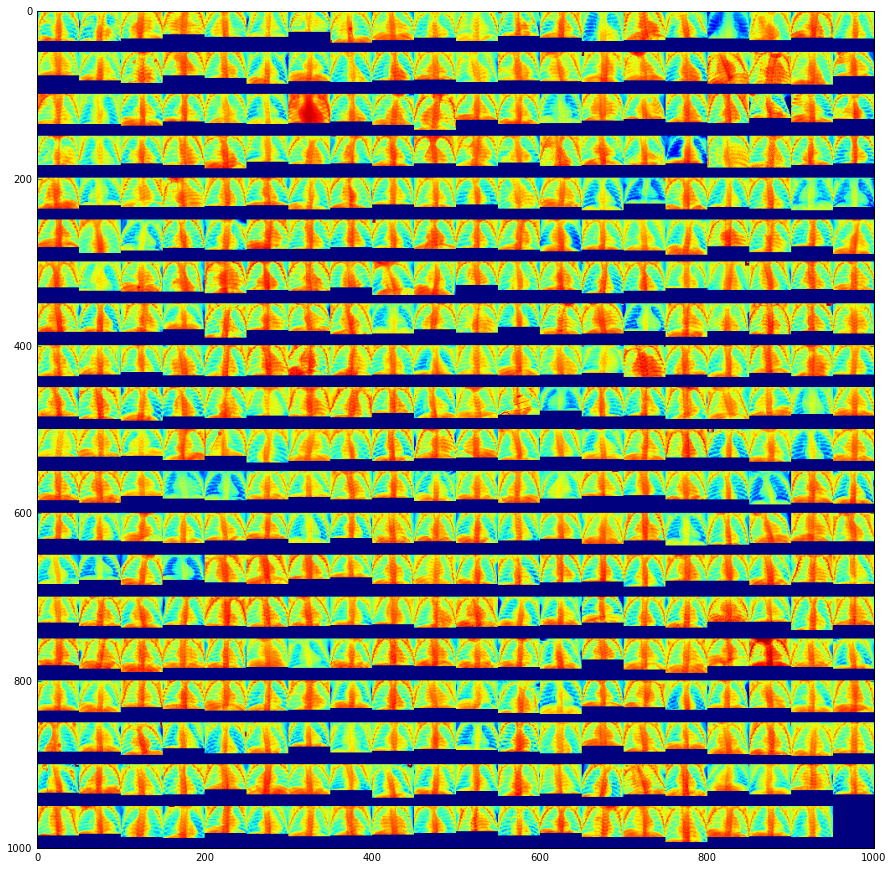

In [307]:
c = np.zeros(( collage_height_px, collage_width_px))
mc = np.zeros(( MASK_collage_height_px, MASK_collage_width_px))
mmc = np.zeros(( MASK_collage_height_px, MASK_collage_width_px ))
row = 0
col = 0
MASK_row = 0
MASK_col = 0
extra_buffer = 0.25
for subjid in bbs.index:
    
    print subjid
    l, u, r, b, ROIw, ROIh, _class, impath, mpath, sort = bbs.ix[ subjid ]
    horiz_padding = int( round( extra_buffer * ROIw ) )
    vert_padding = int( round( extra_buffer * ROIh ) )
    ROIw += 2* horiz_padding
    # Iteration, don't pad the bottom
    #ROIh += 2* vert_padding
    ROIh += vert_padding

    orig_im = imread( clear_prefix + subjid + '.tif', as_grey=True )
    # TIFFs come in as ints with 10bit range, but Jpegs come in as 0.0-1.0 floats
    im = orig_im.astype( np.float64 ) / 1024
    
    im_h, im_w = im.shape

    if l - horiz_padding < 0:
        print "left", l, horiz_padding
        break
    if r + horiz_padding > im_w:
        print "right", r, horiz_padding
        break
    if u - vert_padding < 0:
        print "upper", u, vert_padding
        break
    if b + horiz_padding > im_h:
        print "bottom", b, vert_padding
        break
        
    flag = False
    if _class != 'CLEAR':
        mask_im = imread( mask_prefix + mpath, as_grey=True )
        if im.shape != mask_im.shape:
            #print "\tIM:", im.shape, "MASK:", mask_im.shape
            mask_im = im
            flag = True
    else:
        mask_im = im

    #print subjid, _class, im.max(), (ROIw, ROIh)
    # crop_width: Number of values to remove from the edges of each axis.
    # axis 0: rows, axis 1: columns ROI = (upper, lower), (left, right)

    # Iteration, don't pad the bottom
    #ROI = ( u - vert_padding, im_h - b - vert_padding ), ( l - horiz_padding, im_w - r - horiz_padding )
    ROI = ( u - vert_padding, im_h - b ), ( l - horiz_padding, im_w - r - horiz_padding )
    chest = crop( im, ROI )

    #plt.imshow( chest, interpolation=None )
    maxdim = max( ROIw, ROIh, )
    ratio = float(maxdim) / subject_resolution
    # axis 0: rows/height/vertical, axis1: cols/width/horizontal
    new_size = int( round( float(ROIh) / ratio )), int( round( float( ROIw ) / ratio ) )
    #print subjid, _class, ROI, 'T:', new_size, 'r:{} c:{}'.format( row, col )
    chest_thumb = resize( chest, new_size )
    thumbh, thumbw = chest_thumb.shape
    #if flag:
        #plt.imshow( chest )#, interpolation=None )
    #    plt.imshow( im )#, interpolation=None )
    #    break
    x1 = col * subject_resolution
    x2 = x1 + thumbw
    y1 = row * subject_resolution
    y2 = y1 + thumbh

    c[ y1 : y2, x1 : x2] = chest_thumb
    col += 1
    if col == n_subjects_across:
        col = 0
        row += 1

    orig_chest = crop( orig_im, ROI )
    imsave( clear_prefix + subjid + '_' + _class + '_CROP.tif', orig_chest.astype(np.uint16))

    if _class != 'CLEAR' and not flag:
        chest_trace = crop( mask_im, ROI )
        # round to 0 or 1
        chest_mask = np.rint( chest - chest_trace ) * 255
        chest_mask[ chest_mask < 250 ] = 0
        chest_mask[ chest_mask > 250 ] = 255
        imsave( clear_prefix + subjid + '_' + _class + '_CROP_MASK.tif', chest_mask.astype(np.uint8) )    

        imsave( clear_prefix + subjid + '_' + _class + '_CROP_TRACE.tif', (chest_trace * 255).astype(np.uint8) )

        MASK_ratio = float(maxdim) / MASK_subject_resolution
        MASK_new_size = int( round( float(ROIh) / MASK_ratio )), int( round( float( ROIw ) / MASK_ratio ) )
        #print subjid, _class, ROI, 'T:', new_size, 'r:{} c:{}'.format( row, col )
        chest_trace_thumb = resize( chest_trace, MASK_new_size )
        chest_mask_thumb = resize( chest_mask, MASK_new_size )
        thumbh, thumbw = chest_mask_thumb.shape

        x1 = MASK_col * MASK_subject_resolution
        x2 = x1 + thumbw
        y1 = MASK_row * MASK_subject_resolution
        y2 = y1 + thumbh

        mc[ y1 : y2, x1 : x2] = chest_trace_thumb
        mmc[ y1 : y2, x1 : x2] = chest_mask_thumb
        MASK_col += 1
        if MASK_col == MASK_n_subjects_across:
            MASK_col = 0
            MASK_row += 1
    
fig, ax = plt.subplots( figsize=(15,15,))
ax.imshow(c)

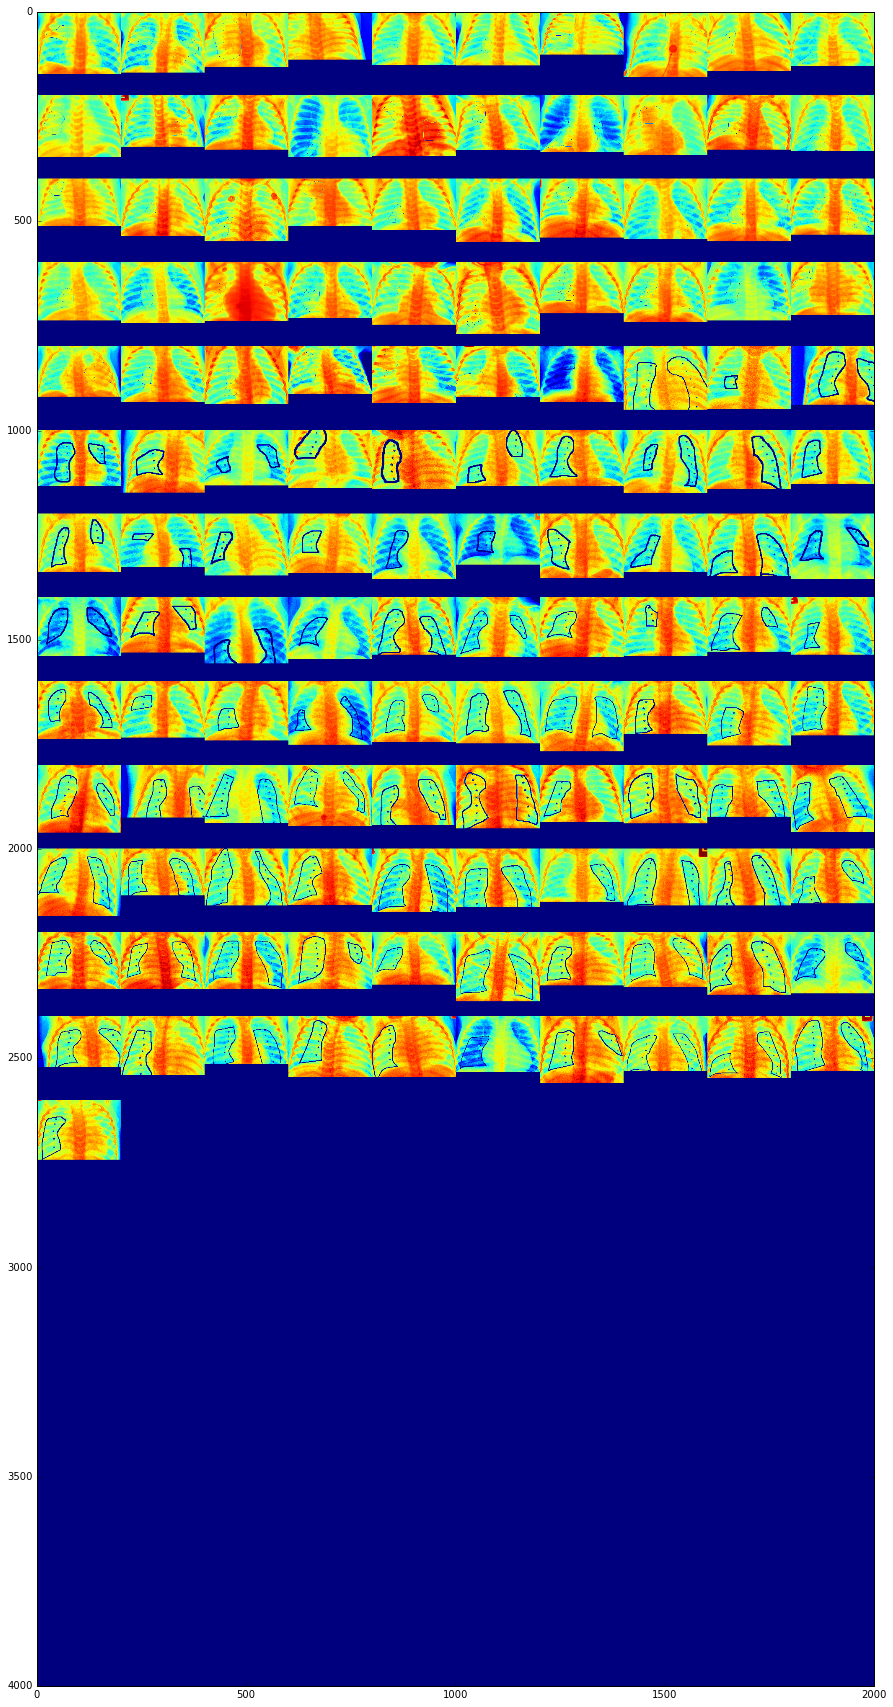

In [308]:
fig, ax = plt.subplots( figsize=(15,30,))
ax.imshow(mc)

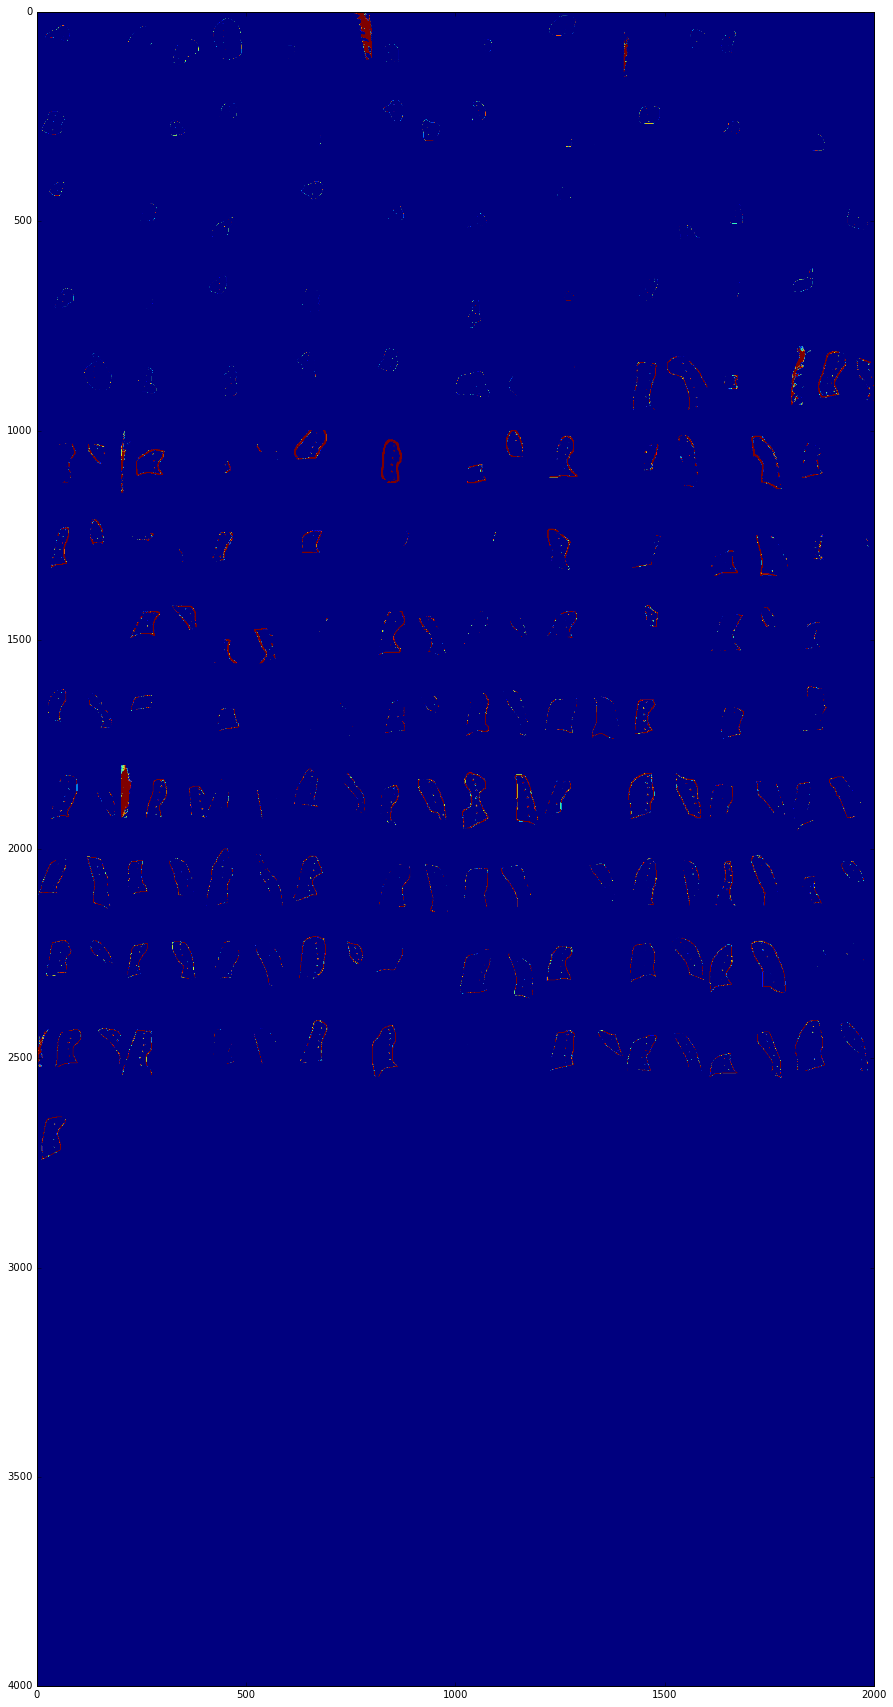

In [309]:
fig, ax = plt.subplots( figsize=(15,30,))
ax.imshow(mmc)

In [249]:
im = imread( clear_prefix + 'K05356' + '-CXR.tif', as_grey=True )

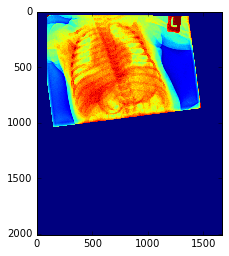

In [250]:
plt.imshow(im)

# Calculate features

In [ ]:
from wndcharm.FeatureSpace import FeatureSpace
import pdb; pdb.set_trace()
fs = FeatureSpace.NewFromFileOfFiles('KENYA_CXR_CASE.fof', long=True, quiet=False)
fs.ToFitFile( 'KENYA_CXR_CASE.fit' )